In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data loaded successfully! Here are the first few rows of each table:

Ratings:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Movies:
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_unknown  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...              0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...              0   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

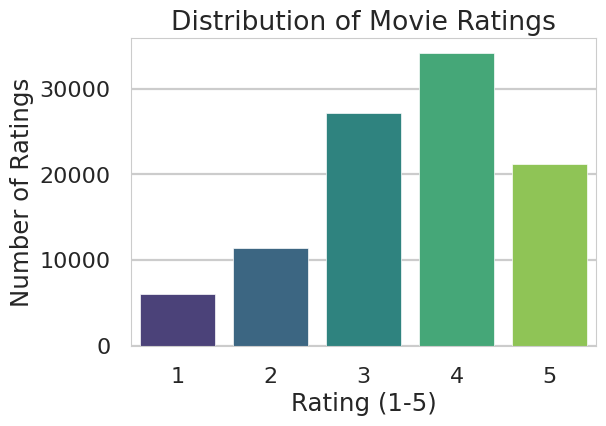

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


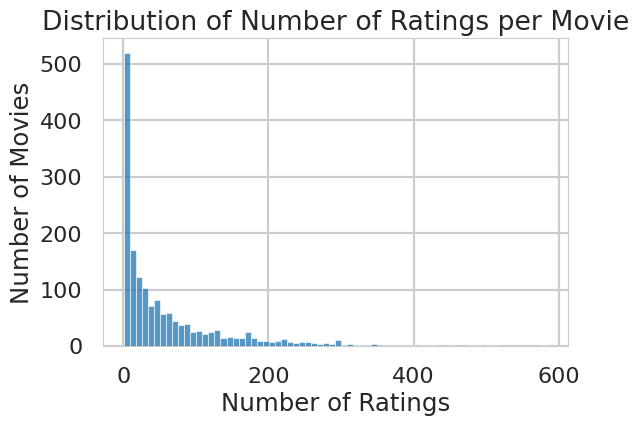


--- Top 10 Most Rated Movies ---
                               mean_rating  rating_count
title                                                   
Star Wars (1977)                  4.358491           583
Contact (1997)                    3.803536           509
Fargo (1996)                      4.155512           508
Return of the Jedi (1983)         4.007890           507
Liar Liar (1997)                  3.156701           485
English Patient, The (1996)       3.656965           481
Scream (1996)                     3.441423           478
Toy Story (1995)                  3.878319           452
Air Force One (1997)              3.631090           431
Independence Day (ID4) (1996)     3.438228           429

--- Top 10 Highest Rated Movies (with >100 ratings) ---
                                  mean_rating  rating_count
title                                                      
Close Shave, A (1995)                4.491071           112
Schindler's List (1993)              4.466443

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


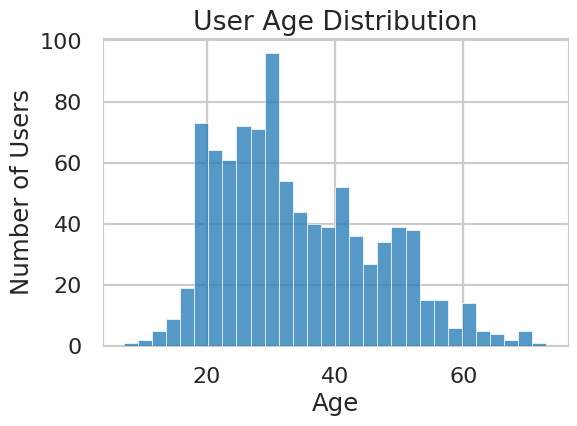

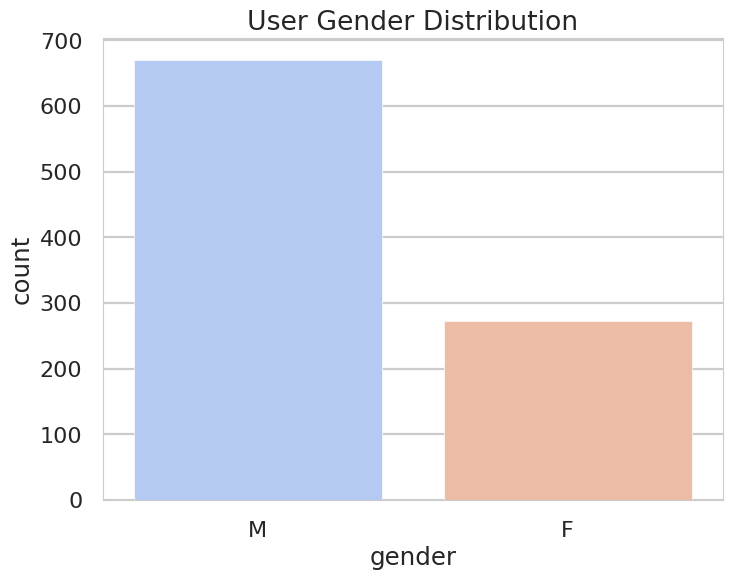

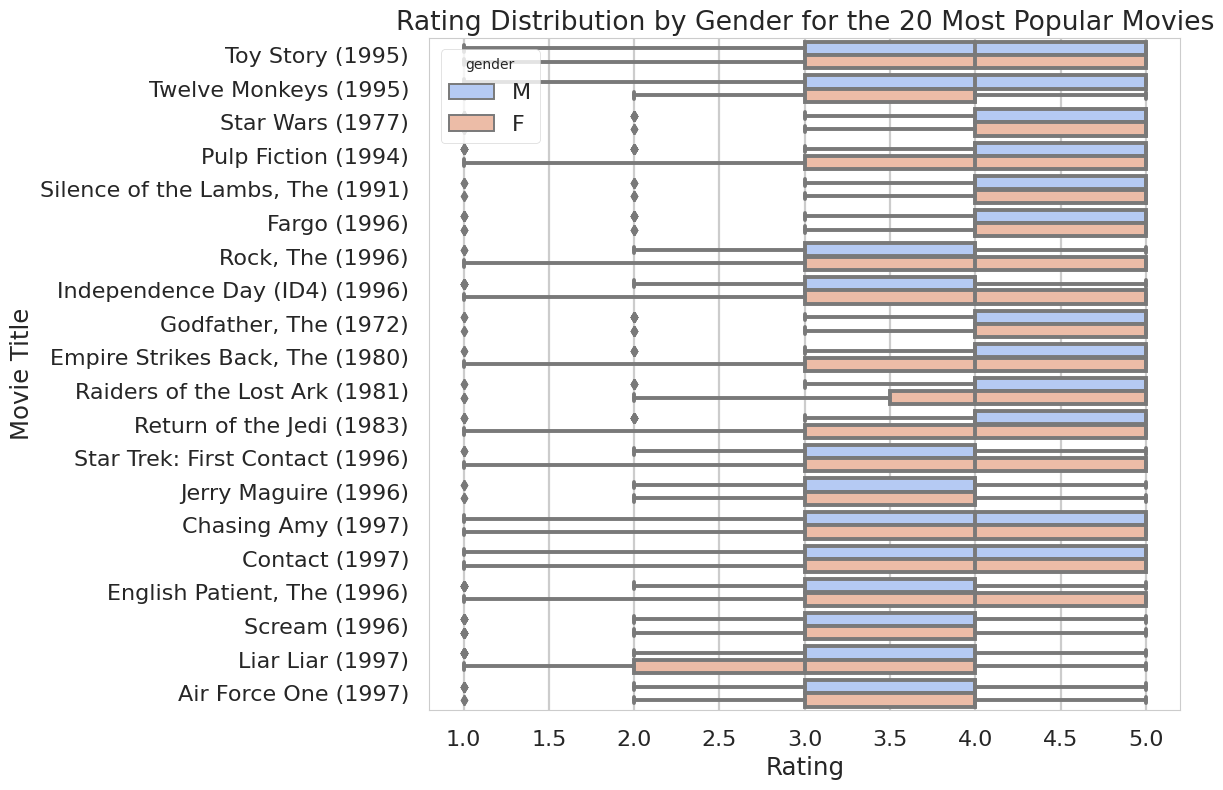

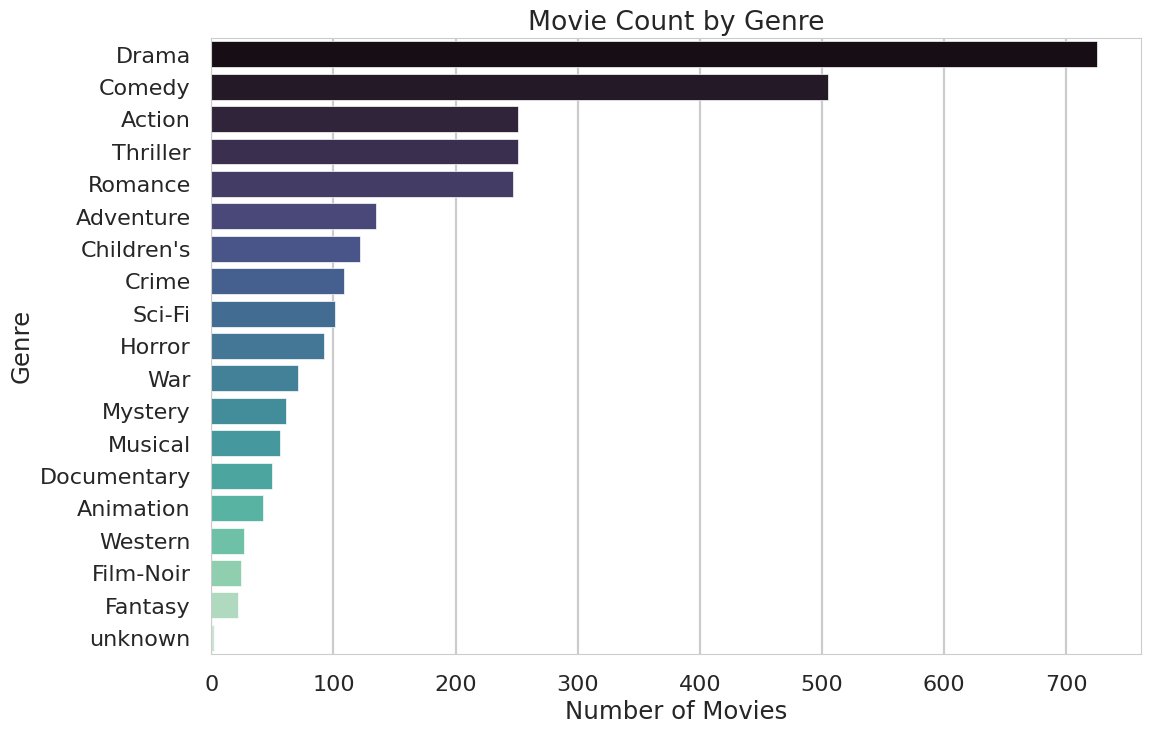

In [16]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-poster')
# The data files don't have headers, so we'll define them.

# u.data -> ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.data', sep='\t', names=r_cols)

# u.item -> movie data
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + [f'genre_{g}' for g in ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
movies = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.item', sep='|', names=m_cols, encoding='latin-1')

# u.user -> user data
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.user', sep='|', names=u_cols)

print("Data loaded successfully! Here are the first few rows of each table:")
print("\nRatings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())
print("\nUsers:")
print(users.head())

# 3. Merge DataFrames
# For a holistic analysis, we merge these three dataframes into one.
movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

print("\nMerged DataFrame created successfully! First 5 rows:")
print(df.head())

plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Ratings')
plt.show()

movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']

# Plot the distribution of rating counts
plt.figure(figsize=(6, 4))
sns.histplot(movie_stats['rating_count'], bins=70, kde=False)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

# Let's look at movies with a high number of ratings to avoid bias from movies with few reviews.
# We'll filter for movies with more than 100 ratings.
popular_movies = movie_stats[movie_stats['rating_count'] > 100]

# Top 10 most rated movies
print("\n--- Top 10 Most Rated Movies ---")
print(popular_movies.sort_values('rating_count', ascending=False).head(10))

# Top 10 highest-rated movies (from the popular list)
print("\n--- Top 10 Highest Rated Movies (with >100 ratings) ---")
print(popular_movies.sort_values('mean_rating', ascending=False).head(10))

# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(users['age'], bins=30, kde=False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=users, palette='coolwarm')
plt.title('User Gender Distribution')
plt.show()

# Ratings by Gender
# Let's analyze the most rated movies and see how ratings differ by gender
top_movie_titles = popular_movies.sort_values('rating_count', ascending=False).head(20).index
top_movies_df = df[df['title'].isin(top_movie_titles)]

plt.figure(figsize=(12, 8))
sns.boxplot(y='title', x='rating', hue='gender', data=top_movies_df, orient='h', palette='coolwarm')
plt.title('Rating Distribution by Gender for the 20 Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

# First, let's get a list of genre columns
genre_cols = [col for col in movies.columns if 'genre_' in col]
# Melt the dataframe to analyze genres
genres_df = movies.melt(id_vars='movie_id', value_vars=genre_cols, var_name='genre', value_name='is_genre')
# Filter for only the rows where the movie belongs to the genre
genres_df = genres_df[genres_df['is_genre'] == 1]
genres_df['genre'] = genres_df['genre'].str.replace('genre_', '') # Clean up genre names

# Plot genre popularity
plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=genres_df, order=genres_df['genre'].value_counts().index, palette='mako')
plt.title('Movie Count by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [4]:
# Create a User-Item Matrix (Foundation for a Recommender System)
# This is a common first step for building a collaborative filtering recommender.
# It creates a matrix with users as rows, movies as columns, and ratings as values.
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
print("\n--- User-Movie Rating Matrix (first 5x5) ---")
print("This sparse matrix is the basis for many recommendation algorithms.")
print(user_movie_matrix.iloc[:5, :5])


--- User-Movie Rating Matrix (first 5x5) ---
This sparse matrix is the basis for many recommendation algorithms.
title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

title    12 Angry Men (1957)  187 (1997)  
user_id                                   
1                        5.0         NaN  
2                        NaN         NaN  
3                        NaN         2.0  
4                        NaN         NaN  
5                        NaN         NaN  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
# Use .fillna() before printing
print(user_movie_matrix.iloc[:5, :5].fillna('-'))

title   'Til There Was You (1997) 1-900 (1994) 101 Dalmatians (1996)  \
user_id                                                                
1                               -            -                   2.0   
2                               -            -                     -   
3                               -            -                     -   
4                               -            -                     -   
5                               -            -                   2.0   

title   12 Angry Men (1957) 187 (1997)  
user_id                                 
1                       5.0          -  
2                         -          -  
3                         -        2.0  
4                         -          -  
5                         -          -  


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
def load_data():
    """
    Loads the MovieLens 100k dataset.
    Uses the u1.base and u1.test files for a pre-defined 80/20 split.
    """
    # Define column names for the ratings data
    r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    
    # Load the training and test sets from the correct path
    # In Kaggle, input files are typically in /kaggle/input/<dataset-folder>/
    data_path = '/kaggle/input/movielens-100k-dataset/ml-100k/'
    ratings_train = pd.read_csv(data_path + 'u1.base', sep='\t', names=r_cols)
    ratings_test = pd.read_csv(data_path + 'u1.test', sep='\t', names=r_cols)

    # Define column names for the movie data - this is the corrected part
    # The u.item file has 24 columns, so we need 24 names.
    m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 
              'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    movies = pd.read_csv(data_path + 'u.item', sep='|', names=m_cols, usecols=['movie_id', 'title'], encoding='latin-1')

    # Merge ratings data with movie titles
    train_df = pd.merge(ratings_train, movies, on='movie_id')
    test_df = pd.merge(ratings_test, movies, on='movie_id')
    
    print("Data loaded and merged successfully.")
    return train_df, test_df

In [8]:
def create_user_item_matrix(df):
    """
    Creates the user-item matrix from the ratings dataframe.
    Rows are users, columns are movies, values are ratings.
    NaNs are filled with 0.
    """
    user_item_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
    # Fill missing values with 0 (meaning the user has not rated the movie)
    user_item_matrix = user_item_matrix.fillna(0)
    return user_item_matrix

In [9]:
def get_recommendations(user_id, user_item_matrix, user_similarity_df, n_recommendations=10):
    """
    Generates movie recommendations for a given user.
    
    Args:
        user_id (int): The ID of the user to get recommendations for.
        user_item_matrix (pd.DataFrame): The user-item rating matrix.
        user_similarity_df (pd.DataFrame): The user-user similarity matrix.
        n_recommendations (int): The number of recommendations to return.
        
    Returns:
        pd.Series: A Series of recommended movie titles, sorted by predicted score.
    """
    # Get similarity scores for the target user and sort them
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # Get the movies the target user has already rated
    seen_movies = user_item_matrix.loc[user_id]
    seen_movies = seen_movies[seen_movies > 0].index
    
    # Dictionary to store recommendation scores
    recommendation_scores = {}
    
    # Iterate through other users, from most similar to least
    for other_user_id, similarity_score in similar_users.items():
        # Skip the user themselves
        if other_user_id == user_id:
            continue
            
        # Get the movies rated by the similar user
        other_user_ratings = user_item_matrix.loc[other_user_id]
        
        # Consider movies the other user rated positively (e.g., > 3)
        for movie, rating in other_user_ratings[other_user_ratings > 3].items():
            # If the movie is new to our target user, calculate a score
            if movie not in seen_movies:
                # The score is the similar user's rating weighted by the similarity
                if movie not in recommendation_scores:
                    recommendation_scores[movie] = 0
                recommendation_scores[movie] += rating * similarity_score
                
    # Convert the scores dictionary to a pandas Series and sort
    recommended_movies_df = pd.Series(recommendation_scores).sort_values(ascending=False)
    
    return recommended_movies_df.head(n_recommendations)

In [10]:
def precision_at_k(test_df, recommendations_df, k=10):
    # A relevant item is a movie the user rated highly (e.g., 4 or 5)
    high_rating_threshold = 4.0
    
    # Get the actual liked movies for each user in the test set
    user_actual_likes = test_df[test_df['rating'] >= high_rating_threshold]\
                        .groupby('user_id')['title'].apply(list).to_dict()

    precisions = []
    for user_id, recommendations in recommendations_df.iterrows():
        if user_id in user_actual_likes:
            actual = user_actual_likes[user_id]
            predicted = recommendations['recommendations']
            
            # Find the intersection of predicted and actual liked movies
            hits = len(set(predicted) & set(actual))
            
            # Precision = (number of hits) / k
            precision = hits / k
            precisions.append(precision)
            
    # Return the average precision
    return np.mean(precisions) if precisions else 0.0

In [11]:
# 1. Load and prepare the data
train_df, test_df = load_data()

# 2. Create the user-item matrix from the training data
train_user_item_matrix = create_user_item_matrix(train_df)

# 3. Compute user similarity using cosine similarity
# The matrix must be (users, features), so we use the matrix as is.
user_similarity = cosine_similarity(train_user_item_matrix)
# Wrap it in a DataFrame for easier access with user_id labels
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=train_user_item_matrix.index, 
                                  columns=train_user_item_matrix.index)

print("\nUser similarity matrix computed.")

# --- DEMONSTRATION: Get recommendations for a sample user ---
SAMPLE_USER_ID = 50
print(f"\n--- Getting Top 10 Recommendations for User ID: {SAMPLE_USER_ID} ---")

# Get movies the user has actually rated highly in the training set
user_50_ratings = train_df[(train_df['user_id'] == SAMPLE_USER_ID) & (train_df['rating'] == 5)]
print("Movies User 50 rated 5 stars (in training data):")
for movie in user_50_ratings['title']:
    print(f"- {movie}")

# Generate and print recommendations
recommendations = get_recommendations(SAMPLE_USER_ID, train_user_item_matrix, user_similarity_df, n_recommendations=10)
print("\nRecommended Movies:")
print(recommendations)

# --- EVALUATION ---
print("\n--- Evaluating Model Performance on Test Set ---")
K = 10

# Get recommendations for all users in the test set
test_users = test_df['user_id'].unique()
all_recommendations = {}

for user_id in test_users:
    # Check if user exists in the training matrix (some test users might be new)
    if user_id in train_user_item_matrix.index:
        user_recs = get_recommendations(user_id, train_user_item_matrix, user_similarity_df, n_recommendations=K)
        all_recommendations[user_id] = list(user_recs.index)

# Corrected DataFrame creation: Convert the dictionary to a Series, then to a DataFrame.
# This correctly handles the list of recommendations as a single column entry.
recommendations_df = pd.Series(all_recommendations).to_frame('recommendations')

# Calculate Precision@K
avg_precision = precision_at_k(test_df, recommendations_df, k=K)

print(f"\nAverage Precision at K={K}: {avg_precision:.4f}")

Data loaded and merged successfully.

User similarity matrix computed.

--- Getting Top 10 Recommendations for User ID: 50 ---
Movies User 50 rated 5 stars (in training data):
- Everyone Says I Love You (1996)
- Lost Highway (1997)
- I Shot Andy Warhol (1996)
- Basquiat (1996)

Recommended Movies:
Star Wars (1977)                    103.722060
Contact (1997)                       83.988800
Godfather, The (1972)                82.556638
English Patient, The (1996)          79.245975
L.A. Confidential (1997)             77.048838
Return of the Jedi (1983)            74.881558
Titanic (1997)                       74.486951
Toy Story (1995)                     66.561353
Twelve Monkeys (1995)                61.672113
Silence of the Lambs, The (1991)     61.264686
dtype: float64

--- Evaluating Model Performance on Test Set ---

Average Precision at K=10: 0.2971
